In [1]:
import numpy as np
from array import array
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
dirin='/home/cstan/classes/clim470/data/'
zDfil='gh.dat'
uDfil='uwnd.dat'
vDfil='vwnd.dat'

In [3]:
ntime=20
nlon=144
nlat=72
recl=(nlon*nlat)*4
z_bin=np.zeros((ntime,nlat,nlon))
u_bin=np.zeros((ntime,nlat,nlon))
v_bin=np.zeros((ntime,nlat,nlon))

In [4]:
ds_z_bin = open(dirin+zDfil,'rb')
for t in range(ntime):
    tmp = ds_z_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    z_bin[t,:,:]=np.reshape(tmp1,(nlat,nlon))
del ds_z_bin,tmp,tmp1

In [5]:
ds_u_bin = open(dirin+uDfil,'rb')
for t in range(ntime):
    tmp = ds_u_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    u_bin[t,:,:]=np.reshape(tmp1,(nlat,nlon))
del ds_u_bin,tmp,tmp1

In [6]:
ds_v_bin = open(dirin+vDfil,'rb')
for t in range(ntime):
    tmp = ds_v_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    v_bin[t,:,:]=np.reshape(tmp1,(nlat,nlon))
del ds_v_bin,tmp,tmp1

In [9]:
# calculate time mean
z_bin_mean = z_bin.mean(axis=0)
u_bin_mean = u_bin.mean(axis=0)
v_bin_mean = v_bin.mean(axis=0)

Text(0.5, 1.0, 'gh snapshot')

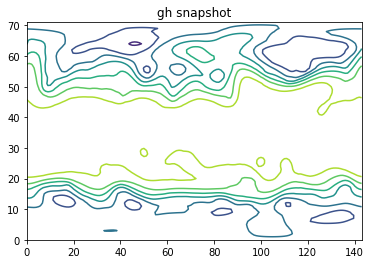

In [7]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contour(z_bin[-1,:,:])
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'gh time mean')

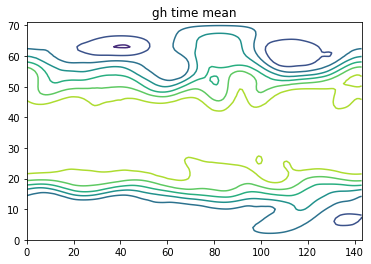

In [10]:
# plot the time average 
fig, ax = plt.subplots()
zc = ax.contour(z_bin_mean)
ax.set_title('gh time mean')

Text(0.5, 1.0, 'gh time mean')

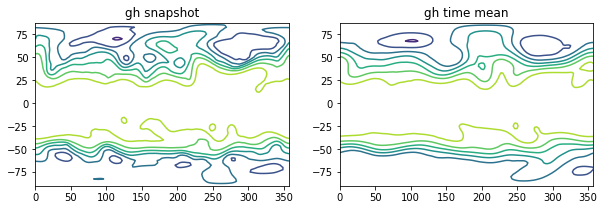

In [11]:
x=np.arange(0,360,2.5)
y=np.arange(-90,90,2.5)
fig, ax = plt.subplots(1,2,figsize=(10,3))
zc = ax[0].contour(x,y,z_bin[-1,:,:])
ax[0].set_title('gh snapshot')
zc_mean = ax[1].contour(x,y,z_bin_mean)
ax[1].set_title('gh time mean')

Text(0.5, 1.0, 'gh time mean')

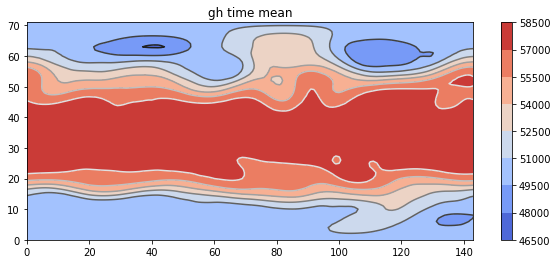

In [12]:
# plot filled contours
fig, ax = plt.subplots(figsize=(10,4))
zc = ax.contourf(z_bin_mean,cmap=cm.coolwarm)
plt.colorbar(zc)

# plot the contour lines using gray lines
zl = ax.contour(z_bin_mean,cmap=cm.gray)
ax.set_title('gh time mean')

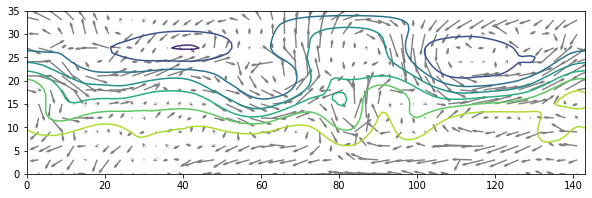

In [13]:
# Plot gh and wind vectors
fig, ax = plt.subplots(figsize=(10,3))
zc = ax.contour(z_bin_mean[36:72,:])
skip=(slice(None, None, 3), slice(None, None, 3))
x=np.arange(nlon)
y=np.arange(nlat)
zc = ax.quiver(x[::3],y[0:36:3],u_bin_mean[36:72,:][skip], v_bin_mean[36:72,:][skip],color='grey',
              headwidth=2,headlength=2)
